## Оглавление:

* [1. Обзор данных](#обзор_данных)
* [2. Предобработка данных](#предобработка_данных)
    * [2.1. Удаление пропусков](#удаление_пропусков)
    * [2.2. Обработка аномальных значений](#обработка_аномальных_значений)
    * [2.3. Обработка дубликатов](#обработка_дубликатов)
    * [2.4. Категоризация данных](#категоризация_данных)
* [3. Проверка гипотез](#проверка_гипотез)
    * [3.1. Количество детей](#дети)
    * [3.2. Семейное положение](#семья)
    * [3.3. Возраст заемщика](#возраст)
    * [3.4. Уровень заработка](#доход)
    * [3.5. Цель получения кредита](#цель)
* [4. Итоги исследования](#итоги_исследования)

# Оценка рынка недвижимости Санкт-Петербурга и Ленинградской области

**Цель исследования** - Нахождение зависимостей между различными параметрами жилья, такими как площадь квартиры, удленность от центра города, наличие балкона и другие.
  
**Ход исследования** - Данные о поведении пользователей получены из файла с расширением .csv. 
К данным приложена документация, однако могут встречаться пропуски или значения, искажающие данные.
Поэтому перед проверкой гипотез требуется провести обзор данных и их обработку.

## 1. Обзор данных <a class="anchor" id="обзор_данных"></a>

В исследовании используются средства библиотеки `pandas`.
Данные получены в виде файла с расширением .csv

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t')

Для общего представления о полученных данных осуществляется вывод первых 5-ти строк таблицы,
а также используется метод `info`.

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Наименования столбцов**
  
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`balcony` — число балконов  
`ceiling_height` — высота потолков (м)  
`cityCenters_nearest` — расстояние до центра города (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
`first_day_exposition` — дата публикации  
`floor` — этаж  
`floors_total` — всего этажей в доме  
`is_apartment` — апартаменты (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)  
`last_price` — цена на момент снятия с публикации  
`living_area` — жилая площадь в квадратных метрах (м²)  
`locality_name` — название населённого пункта  
`open_plan` — свободная планировка (булев тип)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`rooms` — число комнат  
`studio` — квартира-студия (булев тип)  
`total_area` — общая площадь квартиры в квадратных метрах (м²)  
`total_images` — число фотографий квартиры в объявлении  

## 2. Предобработка данных <a class="anchor" id="предобработка_данных"></a>

### 2.1 Удаление пропусков <a class="anchor" id="удаление_пропусков"></a>

В данных наблюдаются множественные пропуски, потребуется их изучение и заполнение релевантными значениями

**Высота потолков**

In [6]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Наблюдаются аномально высокие значения, такие как 27.0, 32.0. Вероятнее всего, реальные значения - 2.7, 3.2 соответственно.  
Все значения больше 20м заменяются на порядок меньшими.

In [7]:
df.replace(df['ceiling_height'][df['ceiling_height'] > 20], df['ceiling_height'][df['ceiling_height'] > 20]/10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Теперь возможно заменить отсутствующие данные медианным значением.

In [8]:
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace = True)

In [47]:
df['ceiling_height'].median()

2.65

**Этажность здания**

In [9]:
df['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

Выбросов не обнаружено, пропуски можно заполнить медианным значением и привести к целочисленным значениям.

In [10]:
df['floors_total'].fillna(df['floors_total'].median(), inplace = True)
df['floors_total'] = df['floors_total'].astype(int)

**Жилая площадь и площадь кухни**
  
Для заполнения пропусков в этих столбцах целесообразно оценить, какую долю от общей площади занимает жилая площадь и кухня соответственно.
  
Таким образом, можно предсказать эти значения там, где они пропущены.

In [11]:
living_area_part = (df['living_area']/df['total_area']).mean()
kitchen_area_part = (df['kitchen_area']/df['total_area']).mean()

df['living_area'].fillna(df['total_area']*living_area_part, inplace = True)
df['kitchen_area'].fillna(df['total_area']*kitchen_area_part, inplace = True)

**Количество балконов**  
**Наличие парков и прудов поблизости**
  
В случае, если количество балконов, а также количество прудов и парков в радиусе 3х километров не указано, предположим, что их нет.
Отсутствующие значения заменяются на `0`

In [12]:
df['balcony'].fillna(0, inplace = True)
df['parks_around3000'].fillna(0, inplace = True)
df['ponds_around3000'].fillna(0, inplace = True)

df['balcony'] = df['balcony'].astype(int)
df['parks_around3000'] = df['parks_around3000'].astype(int)
df['ponds_around3000'] = df['ponds_around3000'].astype(int)

**Длительность размещения объявления**
  
Срок размещения объявления предсказать невозможно. Поскольку эти данные напрямую влияют на дальнейшие исследования, они исключаются из датафрейма.

In [13]:
df = df.dropna(subset='days_exposition').reset_index(drop=True)

**Населенный пункт**
  
Отсутствующие значения в столбце `Населенный пункт` заменяются самым распространенным значением `Санкт-Петербург`

In [14]:
df.groupby('locality_name')['last_price'].count().sort_values(ascending=False)

locality_name
Санкт-Петербург           13638
посёлок Мурино              517
посёлок Шушары              408
Всеволожск                  339
Колпино                     308
                          ...  
посёлок Высокоключевой        1
посёлок Возрождение           1
поселок Дружноселье           1
посёлок Белоостров            1
село Шум                      1
Name: last_price, Length: 330, dtype: int64

In [15]:
df['locality_name'].fillna('Санкт-Петербург', inplace = True)

**Апартаменты**
  
Если не указано, используется ли недвижимость как апартаменты, предполагается, что нет. Пропущенные значения заменяются на `False`

In [16]:
df['is_apartment'].fillna(False, inplace = True)
df['is_apartment'] = df['is_apartment'].astype(bool)

**Аэропорт**
  
Если не указано, на каком расстоянии находится аэропорт, предполагается что аэропорта поблизости нет. Пропущенные значения заменяются на значение, немного большее максимального, т.е. `100км`

In [17]:
df['airports_nearest'].sort_values().unique()

array([    0.,  6450.,  6914., ..., 84006., 84869.,    nan])

In [18]:
df['airports_nearest'].fillna(100000, inplace = True)
df['airports_nearest'] = df['airports_nearest'].astype(int)

**Удаленность от центра**
  
Если значение удаленности от центра пропущено для недвижимости в Санкт-Петербурге, то эти данные напрямую влияют на дальнейшие исследования и их заполнение может исказить результаты, поэтому они исключаются из датафрейма.
  
В случае, если недвижимость расположена не в Санкт-Петербурге, допускается заполнение значением `0`.

In [19]:
df[df['locality_name'] == "Санкт-Петербург"].dropna(subset='cityCenters_nearest').reset_index(drop=True)
df['cityCenters_nearest'].fillna(0, inplace = True)

**Удаленность от парков и прудов**
  
В случае наличия парка или пруда в радиусе 3х км - пропуски заполняются средним значением удаленности.
В случае отсутствия таковых - на `3000м`

In [20]:
df['parks_nearest'][df['parks_around3000']>0].fillna(df['parks_nearest'][df['parks_around3000']>0].mean(), inplace = True)
df['parks_nearest'].fillna(3000, inplace = True)
df['parks_nearest'] = df['parks_nearest'].astype(int)

In [21]:
df['ponds_nearest'][df['ponds_around3000']>0].fillna(df['ponds_nearest'][df['ponds_around3000']>0].mean(), inplace = True)
df['ponds_nearest'].fillna(3000, inplace = True)
df['ponds_nearest'] = df['ponds_nearest'].astype(int)

**Проверка заполнения пропусков**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20518 entries, 0 to 20517
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20518 non-null  int64  
 1   last_price            20518 non-null  float64
 2   total_area            20518 non-null  float64
 3   first_day_exposition  20518 non-null  object 
 4   rooms                 20518 non-null  int64  
 5   ceiling_height        20518 non-null  float64
 6   floors_total          20518 non-null  int32  
 7   living_area           20518 non-null  float64
 8   floor                 20518 non-null  int64  
 9   is_apartment          20518 non-null  bool   
 10  studio                20518 non-null  bool   
 11  open_plan             20518 non-null  bool   
 12  kitchen_area          20518 non-null  float64
 13  balcony               20518 non-null  int32  
 14  locality_name         20518 non-null  object 
 15  airports_nearest   

Все пропущенные значения заполнены или исключены.

### 2.2 Удаление дубликатов <a class="anchor" id="удаление_дубликатов"></a>

Наименования населенных пунктов могут быть записаны по-разному, поэтому необходимо привести их к единому виду.

In [23]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Никольское', 'Новая Ладога',
       'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье',
       'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск',
       'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой',
       'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'городской посёлок Фёдоровское', 'городской посёлок Янино-1',
     

Необходимо убрать слова, обозначающие тип населенного пункта.

In [24]:
for town in ['поселок ', 'посёлок ', 'деревня ', 'село ', 
             'садовое ', 'садоводческое ', 'некоммерческое ', 'товарищество ', 
             'городской ', 'городского типа ', 'коттеджный ', 
             'при железнодорожной ', 'станции ', 
             'Пансионат ', 'Платформа ']:
     df['locality_name'] = df['locality_name'].str.replace(town, '')

In [25]:
df['locality_name'].sort_values().unique()

array(['69-й километр', 'Агалатово', 'Александровская', 'Алексеевка',
       'Аннино', 'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка',
       'Белоостров', 'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино', 'Бор',
       'Борисова Грива', 'Бугры', 'Будогощь', 'Ваганово', 'Важины',
       'Вартемяги', 'Вахнова Кара', 'Вещево', 'Виллози', 'Вознесенье',
       'Возрождение', 'Войсковицы', 'Войскорово', 'Володарское',
       'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Вырица', 'Выскатка',
       'Высокоключевой', 'Высоцк', 'Гаврилово', 'Гарболово', 'Гатчина',
       'Гладкое', 'Глажево', 'Глебычево', 'Глинка', 'Гончарово',
       'Горбунки', 'Гостилицы', 'Громово', 'Дружная Горка', 'Дружноселье',
       'Дубровка', 'Елизаветино', 'Ефимовский', 'Жилгородок',
       'Жилпосёлок', 'Житково', 'Заводской', 'Заклинье', 'Заневка',
       'Запорожское', 'Зеленогорск', 'Зелёный Бор', 'Зимитицы',
       'Ивангород', 'Извара',

Все дублирующие названия приведены к единому виду.

## 3. Дополнение данных <a class="anchor" id="дополнение_данных"></a>

**Цена за м2**
  
Необходимо добавить столбец со стоимостью м2 объектов недвижимости

In [26]:
df['sqare_meter_price'] = df['last_price'] / df['total_area']

**Время размещения объявления**
  
Для дальнейшего исследования добавляются столбцы с днем недели, месяцем и годом размещения объявления о продаже.

In [27]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [28]:
df['exposition_weekday'] = df['first_day_exposition'].dt.dayofweek
df['exposition_month'] = df['first_day_exposition'].dt.month
df['exposition_year'] = df['first_day_exposition'].dt.year

**Тип этажа**
  
Добавляется столбец с типом этажа, на котором располагается квартира:  
`Первый`, `Последний` или `Другой`

In [49]:
df['floor_type'] = 'другой'
df['floor_type'][df['floor'] == df['floors_total']] = 'последний'
df['floor_type'][df['floor'] == 1] = 'первый'

C:\Users\1\AppData\Local\Temp\ipykernel_8896\1709688766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floor_type'][df['floor'] == df['floors_total']] = 'последний'
C:\Users\1\AppData\Local\Temp\ipykernel_8896\1709688766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floor_type'][df['floor'] == 1] = 'первый'


In [30]:
df['floor_type_id'] = 2
df['floor_type_id'][df['floor_type'] == 'первый'] = 1
df['floor_type_id'][df['floor_type'] == 'последний'] = 3

C:\Users\1\AppData\Local\Temp\ipykernel_8896\286785273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floor_type_id'][df['floor_type'] == 'первый'] = 1
C:\Users\1\AppData\Local\Temp\ipykernel_8896\286785273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floor_type_id'][df['floor_type'] == 'последний'] = 3


**Удаленность от центра в км**

Значения удаленности от центра переводятся в км и округляются.

In [31]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] / 1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].round(0).astype(int)

**Проверка дополненности датафрейма**

In [32]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sqare_meter_price,exposition_weekday,exposition_month,exposition_year,floor_type,floor_type_id,cityCenters_nearest_km
0,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,0,3000,81.0,82920.792079,1,12,2018,первый,1,19
1,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,2,574,558.0,92785.714286,3,8,2015,другой,2,14
2,0,64900000.0,159.0,2015-07-24,3,2.65,14,89.797718,9,False,...,3,234,424.0,408176.100629,4,7,2015,другой,2,7
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48,121.0,100000.000000,1,6,2018,другой,2,8
4,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.400000,5,False,...,0,3000,55.0,95065.789474,0,9,2018,другой,2,0


Все необходимые для исследования данные добавлены.

## 4. Исследовательский анализ <a class="anchor" id="исследовательский_анализ"></a>

### 4.1. Оценка распределения значений <a class="anchor" id="оценка_распределения"></a>

Для оценки корректности имеющихся данных следует изучить распределение значений для следующих параметров:
    
* Цена 
* Площадь
* Количество комнат
* Высота потолков
* Этажность
* Инфраструктура
* Размещение объявления

**Цена** <a class="anchor" id="цена"></a>

In [33]:
def top_range (col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    top_range = Q3+IQR*1.5 
    return top_range

def bottom_range (col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    bottom_range = Q1-IQR*1.5 
    return bottom_range

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

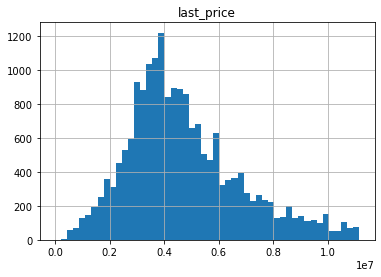

In [34]:
df.hist(column='last_price', 
        bins=50, 
        range=(0,top_range('last_price'))
       )

Гистограмма цен близка к нормальному распределению, что говорит о доствоерности имеющихся данных.
Наибольшее количество объявлений размещено для объектов стоимостью от 3 до 5 млн.руб.

**Площадь** <a class="anchor" id="площадь"></a>

In [35]:
square_to_analyse = ['total_area', 'living_area', 'kitchen_area']

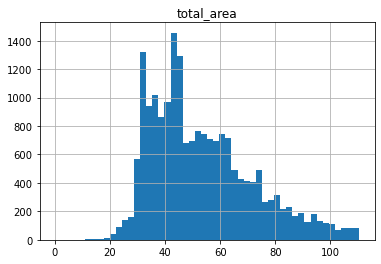

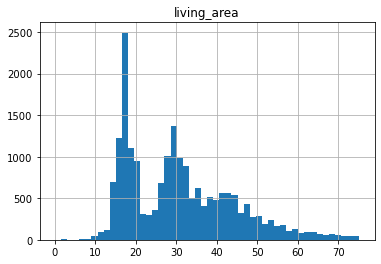

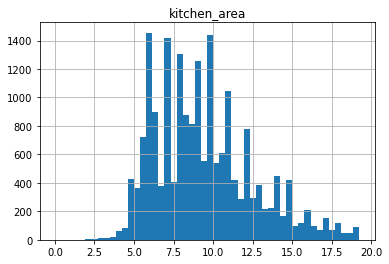

In [36]:
for col in square_to_analyse:
    df.hist(column=col, bins=50, range=(0,top_range(col)))

Гистограммы общей площади и площади кухни также соответствуют нормальному распределению и свидетельствуют о корректности данных.

Однако, распределение значений жилой площади квартир имеет 2 явных пика, около 18м2 и 30м2. Необходимо изучить причину данной аномалии.

<div class="alert alert-info"> 
    
Подскажите пожалуйста, как можно проверить причину такого распределения жилой площади, не вижу связи с общей площадью и другими параметрами

</div>

**Количество комнат** <a class="anchor" id="количество_комнат"></a>

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

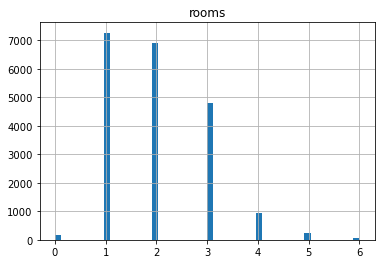

In [37]:
df.hist(column='rooms', bins=50, range=(0,top_range('rooms')))

Наибольшее количество объявлений для однокомнатных и двухкомнатных квартир, что коррелирует с данными по площади и стоимости.

Заметны данные со значением `0`, их необходимо изучить подробнее.

**Высота потолков** <a class="anchor" id="высота_потолков"></a>

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

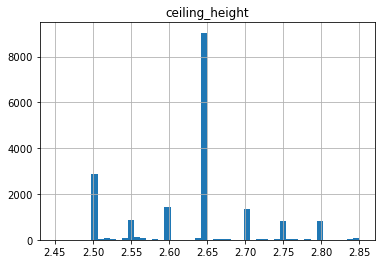

In [38]:
df.hist(column='ceiling_height', bins=50, range=(bottom_range('ceiling_height'),top_range('ceiling_height')))

Большое количество объектов с высотой потолков `2.65м` обусловлено тем, что это значение является медианным и им было заполнено порядка 10000 строк.

Также наблюдается кратность `5см` для высоты потолков.

**Этажность** <a class="anchor" id="этажность"></a>

In [39]:
floors_to_analyse = ['floor', 'floors_total']

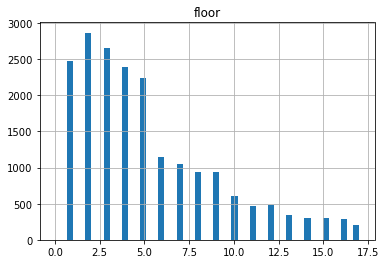

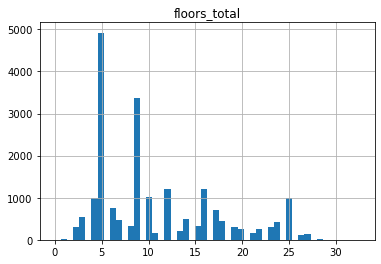

In [40]:
for col in floors_to_analyse:
    df.hist(column=col, bins=50, range=(0,top_range(col)))

array([[<AxesSubplot:title={'center':'floor_type_id'}>]], dtype=object)

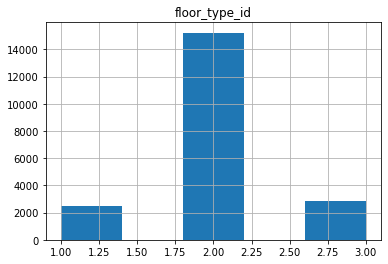

In [78]:
df.hist(column='floor_type_id', bins=5)

Как видно из гистограммы `floors_total` - больше всего объявлений размещено для квартир в 5-ти и 9-ти этажных домах.
Следовательно, чаще всего этаж, на котором расположена квартира находится в этом диапазоне.
Гистограмма типа этажа также соответствует данному распределению

Также стоит заметить, что 1 этаж не является самым популярным, хотя статистически таких квартир должно быть больше всего.
Это может быть связано с тем, что в некоторых объявлениях может быть указан 2-й этаж, несмотря на то, что квартира фактически располагается на 1-м.

**Инфраструктура** <a class="anchor" id="инфраструктура"></a>

In [42]:
surrounding_to_analyse = ['cityCenters_nearest', 'airports_nearest', 'parks_nearest']

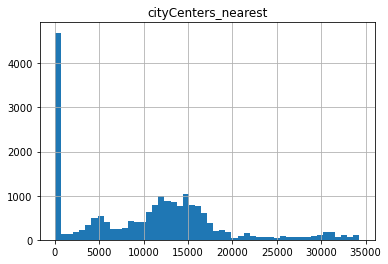

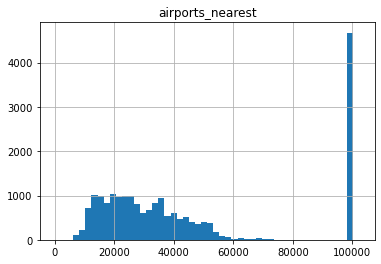

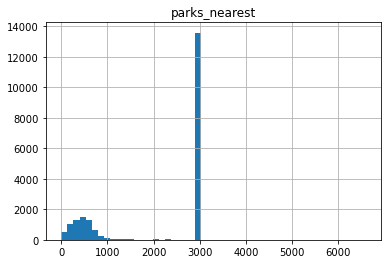

In [43]:
for col in surrounding_to_analyse:
    df.hist(column=col, bins=50, range=(0,top_range(col)))

Выбивающиеся значения `0` для удаленноти от центра, `100000` для расстояния до аэропорта и `3000` для расстояния до парка обусловлены заполнением отсутствующих значений этими данными.
В дальнейшем анализе их учитывать не следует.

2 максимума значений удаленности от центра могут быть связаны с тем, что приведены данные для разных населенных пунктов. Следует проверить эту гипотезу, составив гистограмму только для недвижимости в Санкт-Петербурге.

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

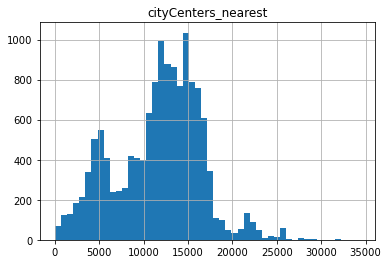

In [56]:
df.query('locality_name == "Санкт-Петербург"').hist(column='cityCenters_nearest', 
                                                    bins=50, 
                                                    range=(0,top_range('cityCenters_nearest')))

Гипотеза оказалась ошибочной, 2 максимума наблюдаются в том числе для недвижимости Санкт-Петербурга.

<div class="alert alert-info"> 
    
Подскажите пожалуйста, как можно проверить природу данной аномалии, не нахожу зависимостей

</div>

**Размещение объявления** <a class="anchor" id="размещение_объявления"></a>

In [57]:
exposition_to_analyse = ['exposition_weekday', 'exposition_month', 'exposition_year']

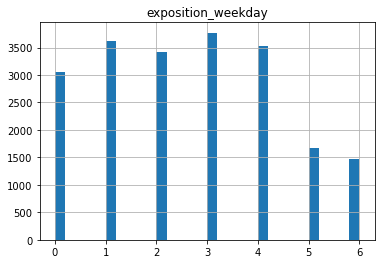

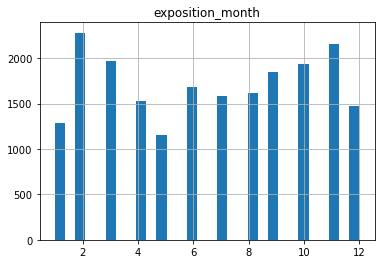

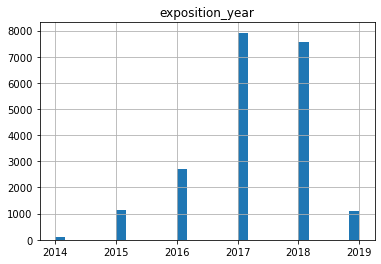

In [73]:
for col in exposition_to_analyse:
    df.hist(column=col, bins=30)

Как видно, в выходные размещается наименьшее количество объявлений. Вероятно, это связано с графиком работы агенств недвижимости.

Также за последние 5 лет наблюдается значительный рост числа объявлений. Данные за 2019 год неполные, поэтому низкое значение данного столбца не является показателем снижения активности.

### 4.2. Изучение скорости продажи недвижимости <a class="anchor" id="изучение_скорости"></a>

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

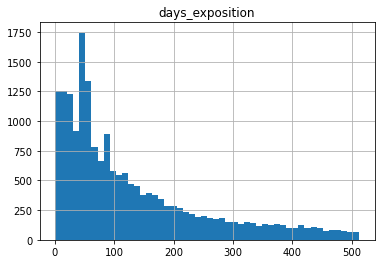

In [81]:
df.hist(column='days_exposition', bins=50, range=(0,top_range('days_exposition')))

In [84]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Как видно из расчетов, большая часть объектов продается менее чем за 3 месяца.
Заметно значительное отличие среднего значения от медианного в связи с наличием "выбросов", объявлений, открытых по несколько лет.

### 4.2. Зависимость цены от различных параметров <a class="anchor" id="зависимость цены"></a>

In [97]:
corr_list = ['total_area', 'living_area', 'kitchen_area', 
             'rooms', 'floor_type_id', 
             'exposition_weekday', 'exposition_month', 'exposition_year']

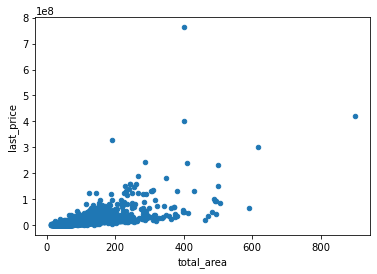

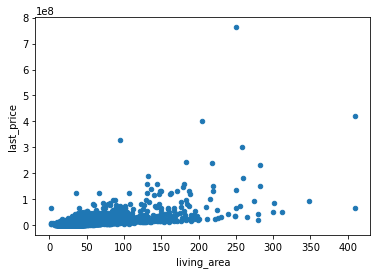

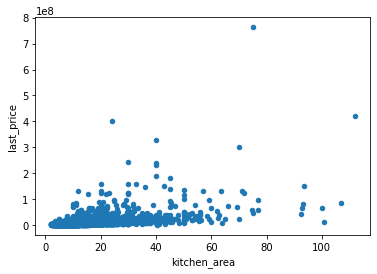

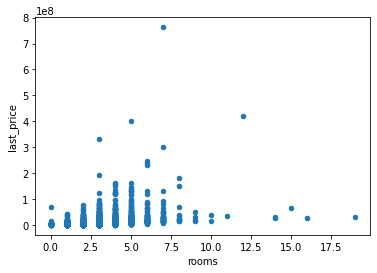

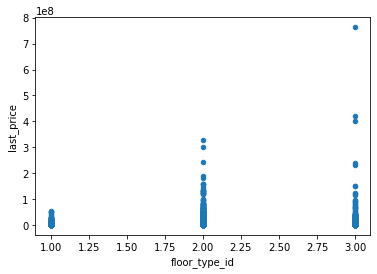

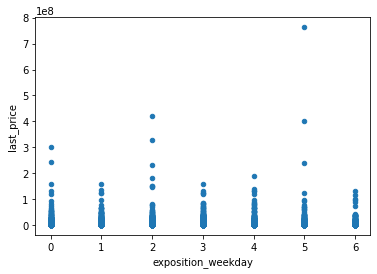

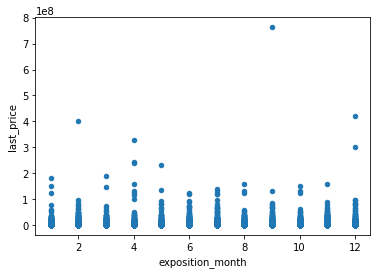

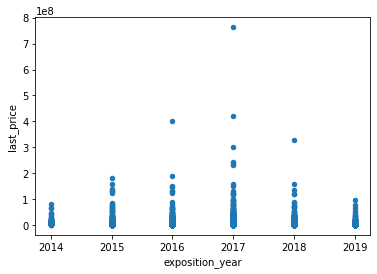

In [101]:
for parameter in corr_list:
    df.plot(kind='scatter',  
            x=parameter, 
            y='last_price',)